<a href="https://colab.research.google.com/github/Hungcodes/CSS/blob/main/Exercise_5_Survival.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

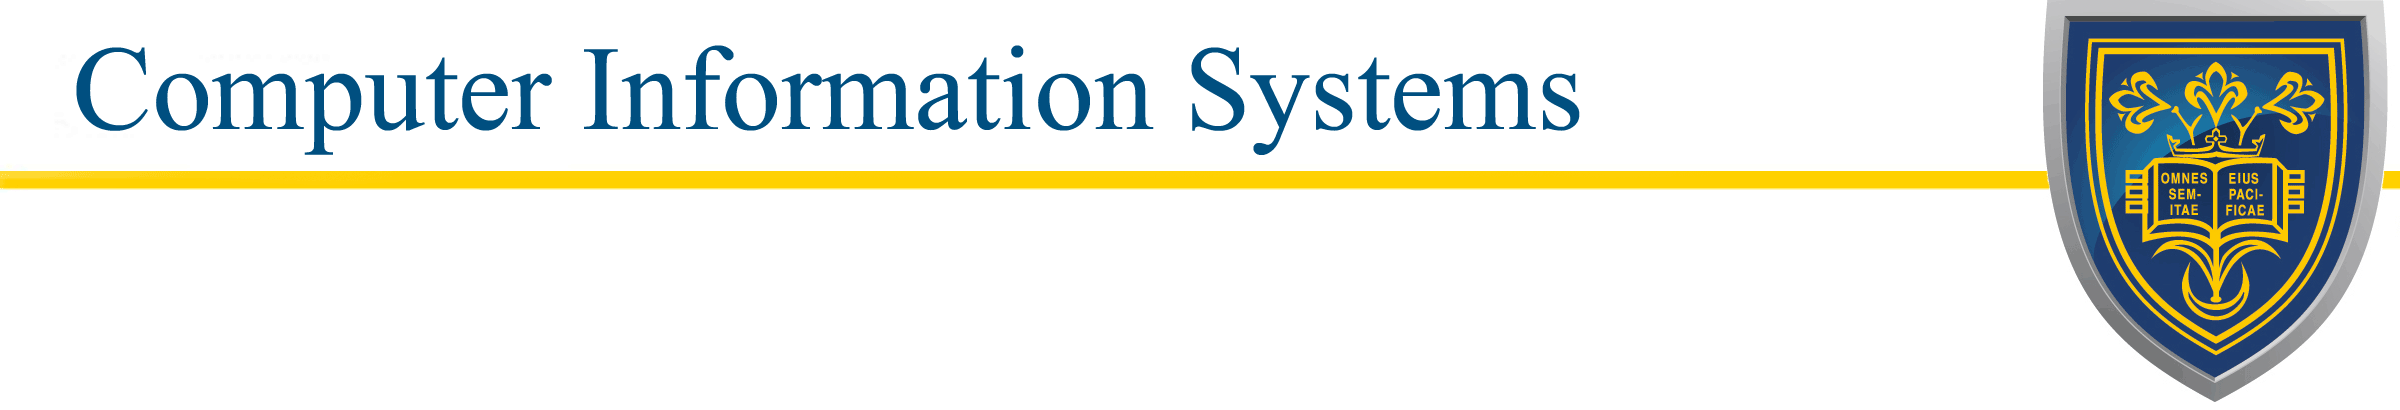


# **Exercise 5 - Survival Models**
In this notebook, the employe attrition dataset is loaded, the dataset prepared for analysis, and a suvival model is developed and evaluated. The notebook is broken down by steps that correspond with the steps outlined in the [Exercise 5 assignment](https://docs.google.com/document/d/1HYCKO0SiNd2Ihv2fesGV3e9uy2ADGQik5U6h9aIaEDk/edit?usp=drive_link). Additionally, I included comments within the code to help you understand the purpose of the code.

Please execute this notebook in the correct order and pay close attention to the output as well as the code used to generate this output. You must be able to follow the code in a manner that allows you to write your own code. The code comments and my write up in the notebook should provide you with an example of the type of comments I expect to see in your R scripts.

**Step 1: Load the dataset and view the dataset**

In this step, the coded is downloaded from my Github account using a unique URL and loaded into the Attrition dataframe. Once the dataframe is loaded, I take a glimpse of the data. This provides an underestanding of the size of the data and the variables in my dataset.

In [ ]:
#install libraries that are not a part of the defaul Colab library
install.packages(c('survminer','ggpubr','survival','censored'))

#load all libraries needed for this analysis
library(tidyverse)  #for data manipulation
library(survminer)  #for producing the survival plots
library(ggpubr)     #for presenting groupings of plots
library(survival)   #for survival analysis models
library(censored)   #for censoring data

#load data from My GitHub account
url <- "https://raw.githubusercontent.com/itprofessor-git/analytics/master/EmployeeAttrition.csv"
Attrition <- read.csv(url, header = TRUE)

#review the Employee Attrition data to see the number of rows and columns and the names of the colums
glimpse(Attrition)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘future’, ‘markdown’, ‘png’, ‘jpeg’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘libcoin’, ‘Formula’, ‘inum’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘exactRankTests’, ‘mvtnorm’, ‘KMsurv’, ‘zoo’, ‘km.ci’, ‘xtable’, ‘gridtext’, ‘Rcpp’, ‘corrplot’, ‘car’, ‘globals’, ‘DiceDesign’, ‘stabs’, ‘nnls’, ‘quadprog’, ‘partykit’, ‘diagram’, ‘lava’, ‘gridExtra’, ‘maxstat’, ‘survMisc’, ‘ggtext’, ‘ggrepel’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘polynom’, ‘rstatix’, ‘parsnip’, ‘dials’, ‘hardhat’, ‘mboost’, ‘prodlim’


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
──

Rows: 1,470
Columns: 35
$ Age                      <int> 41, 49, 37, 33, 27, 32, 59, 30, 38, 36, 35, 2…
$ Attrition                <chr> "Yes", "No", "Yes", "No", "No", "No", "No", "…
$ BusinessTravel           <chr> "Travel_Rarely", "Travel_Frequently", "Travel…
$ DailyRate                <int> 1102, 279, 1373, 1392, 591, 1005, 1324, 1358,…
$ Department               <chr> "Sales", "Research & Development", "Research …
$ DistanceFromHome         <int> 1, 8, 2, 3, 2, 2, 3, 24, 23, 27, 16, 15, 26, …
$ Education                <int> 2, 1, 2, 4, 1, 2, 3, 1, 3, 3, 3, 2, 1, 2, 3, …
$ EducationField           <chr> "Life Sciences", "Life Sciences", "Other", "L…
$ EmployeeCount            <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …
$ EmployeeNumber           <int> 1, 2, 4, 5, 7, 8, 10, 11, 12, 13, 14, 15, 16,…
$ EnvironmentSatisfaction  <int> 2, 3, 4, 4, 1, 4, 3, 4, 4, 3, 1, 4, 1, 2, 3, …
$ Gender                   <chr> "Female", "Male", "Male", "Female", "Male", "…
$ HourlyRate    

**Step 2: Conduct EDA**

In this setp, an Exploratory Data Analysis is conducted on the dataset to become oriented with the data and to begin designing the survival models. The EDA includes a univeriate analysis to understand the range and distribution of values and a bivariate analysis to understand potential correlations.

In this EDA, several quantitative and categorical values are studied. The quantitative values include: Age, DistanceFromHome, HourlyRate, NumCompaniesWorked, PercentSalaryHike, TotalWorkingYears, YearsAtCompany, YearsInCurrentRole, and YearsSinceLastPromotion. The categorical values selected for analysis are: Attrition, BusinessTravel, Department, Gender, JobRole, JobSatisfaction, MaritalStatus, PerformanceRating, and WorkLifeBalance.

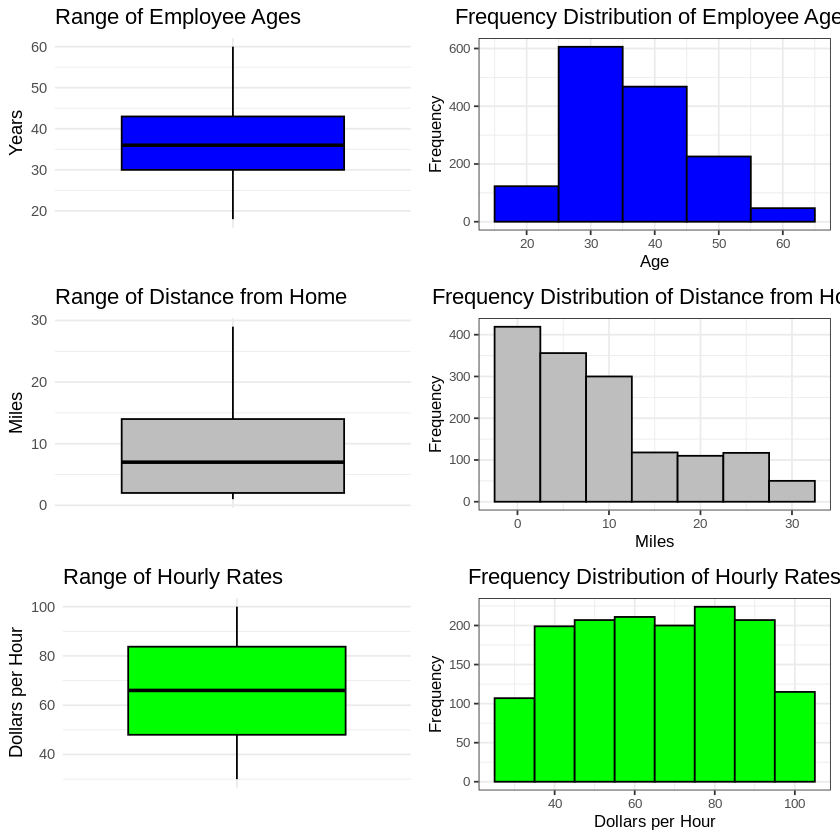

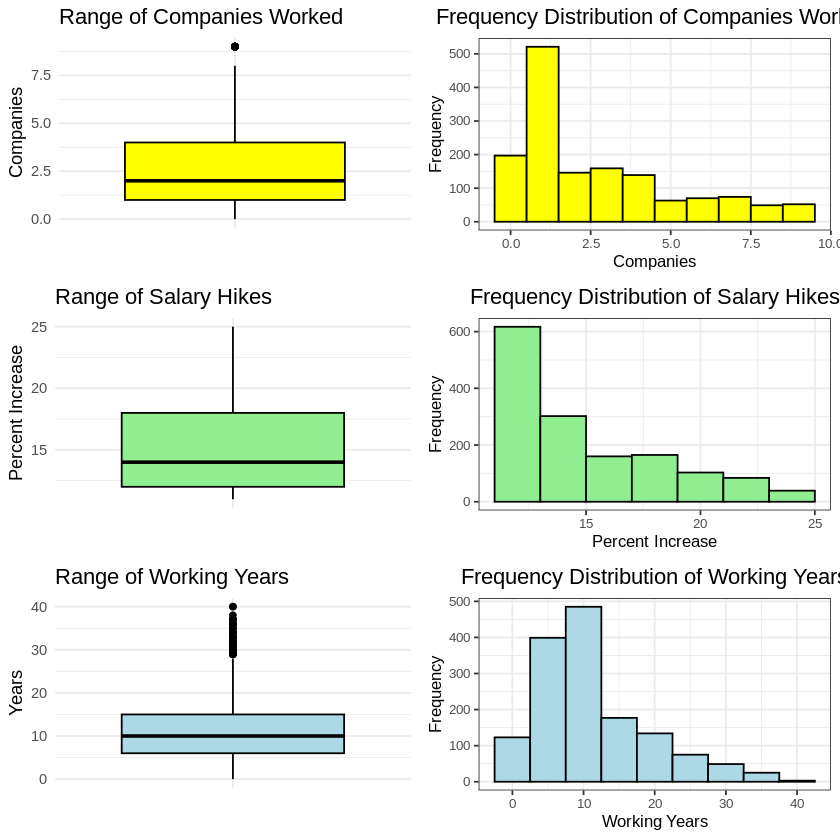

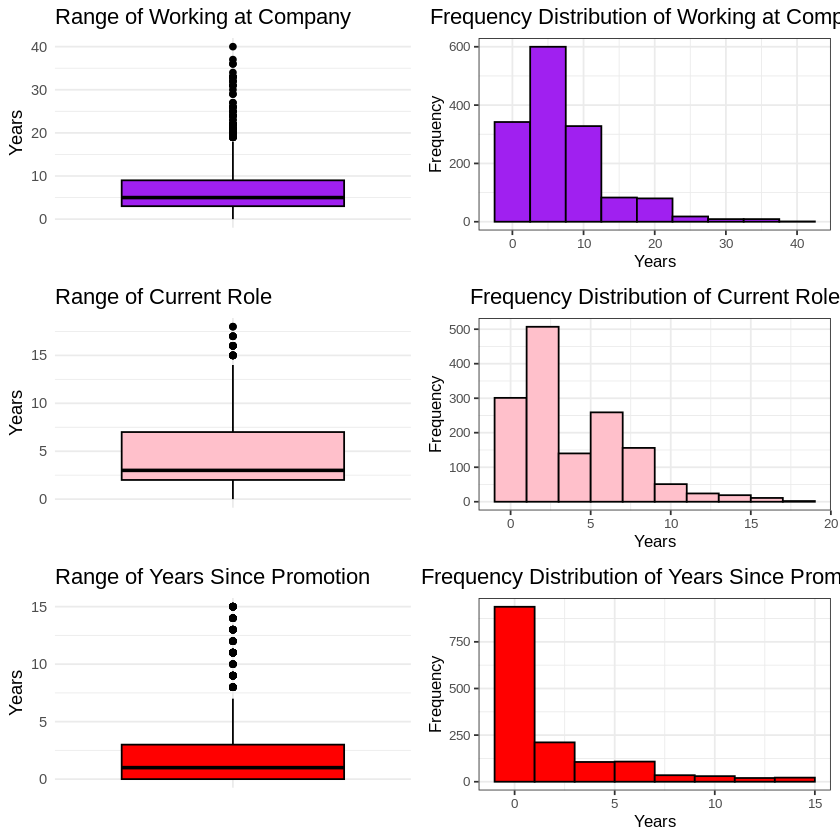

In [ ]:
#Part 1 - Univariate Analysis of Quantitative Values

#Plot frequency rang and distribution of employee age
PlotQ1a <-
  ggplot(Attrition, aes(x = "", y = Age)) +
    geom_boxplot(fill = "blue", color = "black") +
    labs(title = "Range of Employee Ages", x = "", y = "Years") +
    theme_minimal()

PlotQ1b <-
  ggplot(Attrition, aes(x = Age)) +
    geom_histogram(binwidth = 10, color = "black", fill = "blue") +
    labs(title = "Frequency Distribution of Employee Ages",
      x = "Age", y = "Frequency") +
      theme_bw() +
      theme(plot.title = element_text(hjust = 0.5),
        axis.text = element_text(size = 8),
        axis.title = element_text(size = 10))


#Plot frequency rang and distribution of employee distance from home
PlotQ2a <-
  ggplot(Attrition, aes(x = "", y = DistanceFromHome)) +
    geom_boxplot(fill = "grey", color = "black") +
    labs(title = "Range of Distance from Home", x = "", y = "Miles") +
    theme_minimal()

PlotQ2b <-
  ggplot(Attrition, aes(x = DistanceFromHome)) +
    geom_histogram(binwidth = 5, color = "black", fill = "grey") +
    labs(title = "Frequency Distribution of Distance from Home",
      x = "Miles", y = "Frequency") +
      theme_bw() +
      theme(plot.title = element_text(hjust = 0.5),
        axis.text = element_text(size = 8),
        axis.title = element_text(size = 10))


#Plot frequency rang and distribution of employee hourly rate
PlotQ3a <-
  ggplot(Attrition, aes(x = "", y = HourlyRate)) +
    geom_boxplot(fill = "green", color = "black") +
    labs(title = "Range of Hourly Rates", x = "", y = "Dollars per Hour") +
    theme_minimal()

PlotQ3b <-
  ggplot(Attrition, aes(x = HourlyRate)) +
    geom_histogram(binwidth = 10, color = "black", fill = "green") +
    labs(title = "Frequency Distribution of Hourly Rates",
      x = "Dollars per Hour", y = "Frequency") +
      theme_bw() +
      theme(plot.title = element_text(hjust = 0.5),
        axis.text = element_text(size = 8),
        axis.title = element_text(size = 10))


#Plot frequency rang and distribution of companies worked
PlotQ4a <-
  ggplot(Attrition, aes(x = "", y = NumCompaniesWorked)) +
    geom_boxplot(fill = "yellow", color = "black") +
    labs(title = "Range of Companies Worked", x = "", y = "Companies") +
    theme_minimal()

PlotQ4b <-
  ggplot(Attrition, aes(x = NumCompaniesWorked)) +
    geom_histogram(binwidth = 1, color = "black", fill = "yellow") +
    labs(title = "Frequency Distribution of Companies Worked",
      x = "Companies", y = "Frequency") +
      theme_bw() +
      theme(plot.title = element_text(hjust = 0.5),
        axis.text = element_text(size = 8),
        axis.title = element_text(size = 10))


#Plot frequency rang and distribution of employee salary hike
PlotQ5a <-
  ggplot(Attrition, aes(x = "", y = PercentSalaryHike)) +
    geom_boxplot(fill = "lightgreen", color = "black") +
    labs(title = "Range of Salary Hikes", x = "", y = "Percent Increase") +
    theme_minimal()

PlotQ5b <-
  ggplot(Attrition, aes(x = PercentSalaryHike)) +
    geom_histogram(binwidth = 2, color = "black", fill = "lightgreen") +
    labs(title = "Frequency Distribution of Salary Hikes",
      x = "Percent Increase", y = "Frequency") +
      theme_bw() +
      theme(plot.title = element_text(hjust = 0.5),
        axis.text = element_text(size = 8),
        axis.title = element_text(size = 10))


#Plot frequency rang and distribution of employee working years
PlotQ6a <-
  ggplot(Attrition, aes(x = "", y = TotalWorkingYears)) +
    geom_boxplot(fill = "lightblue", color = "black") +
    labs(title = "Range of Working Years", x = "", y = "Years") +
    theme_minimal()

PlotQ6b <-
  ggplot(Attrition, aes(x = TotalWorkingYears)) +
    geom_histogram(binwidth = 5, color = "black", fill = "lightblue") +
    labs(title = "Frequency Distribution of Working Years",
      x = "Working Years", y = "Frequency") +
      theme_bw() +
      theme(plot.title = element_text(hjust = 0.5),
        axis.text = element_text(size = 8),
        axis.title = element_text(size = 10))


#Plot frequency rang and distribution of employee years at company
PlotQ7a <-
  ggplot(Attrition, aes(x = "", y = YearsAtCompany)) +
    geom_boxplot(fill = "purple", color = "black") +
    labs(title = "Range of Working at Company", x = "", y = "Years") +
    theme_minimal()

PlotQ7b <-
  ggplot(Attrition, aes(x = YearsAtCompany)) +
    geom_histogram(binwidth = 5, color = "black", fill = "purple") +
    labs(title = "Frequency Distribution of Working at Company",
      x = "Years", y = "Frequency") +
      theme_bw() +
      theme(plot.title = element_text(hjust = 0.5),
        axis.text = element_text(size = 8),
        axis.title = element_text(size = 10))


#Plot frequency rang and distribution of employee in current role
PlotQ8a <-
  ggplot(Attrition, aes(x = "", y = YearsInCurrentRole)) +
    geom_boxplot(fill = "pink", color = "black") +
    labs(title = "Range of Current Role", x = "", y = "Years") +
    theme_minimal()

PlotQ8b <-
  ggplot(Attrition, aes(x = YearsInCurrentRole)) +
    geom_histogram(binwidth = 2, color = "black", fill = "pink") +
    labs(title = "Frequency Distribution of Current Role",
      x = "Years", y = "Frequency") +
      theme_bw() +
      theme(plot.title = element_text(hjust = 0.5),
        axis.text = element_text(size = 8),
        axis.title = element_text(size = 10))


#Plot frequency rang and distribution of employee since last promotion
PlotQ9a <-
  ggplot(Attrition, aes(x = "", y = YearsSinceLastPromotion)) +
    geom_boxplot(fill = "red", color = "black") +
    labs(title = "Range of Years Since Promotion", x = "", y = "Years") +
    theme_minimal()

PlotQ9b <-
  ggplot(Attrition, aes(x = YearsSinceLastPromotion)) +
    geom_histogram(binwidth = 2, color = "black", fill = "red") +
    labs(title = "Frequency Distribution of Years Since Promotion",
      x = "Years", y = "Frequency") +
      theme_bw() +
      theme(plot.title = element_text(hjust = 0.5),
        axis.text = element_text(size = 8),
        axis.title = element_text(size = 10))

#Diplay the plots in a 2x2 matrix
ggarrange(PlotQ1a,PlotQ1b,PlotQ2a,PlotQ2b,PlotQ3a,PlotQ3b,ncol=2,nrow=3)
ggarrange(PlotQ4a,PlotQ4b,PlotQ5a,PlotQ5b,PlotQ6a,PlotQ6b,ncol=2,nrow=3)
ggarrange(PlotQ7a,PlotQ7b,PlotQ8a,PlotQ8b,PlotQ9a,PlotQ9b,ncol=2,nrow=3)

#Cleanup
rm(PlotQ1a,PlotQ1b,PlotQ2a,PlotQ2b,PlotQ3a,PlotQ3b,
  PlotQ4a,PlotQ4b,PlotQ5a,PlotQ5b,PlotQ6a,PlotQ6b,
  PlotQ7a,PlotQ7b,PlotQ8a,PlotQ8b,PlotQ9a,PlotQ9b)

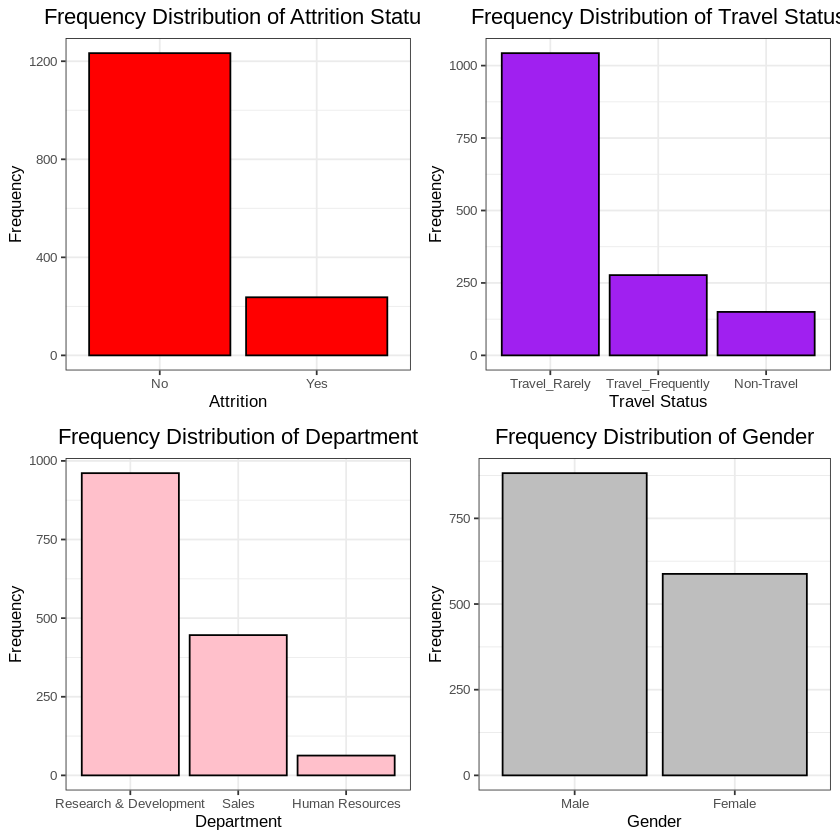

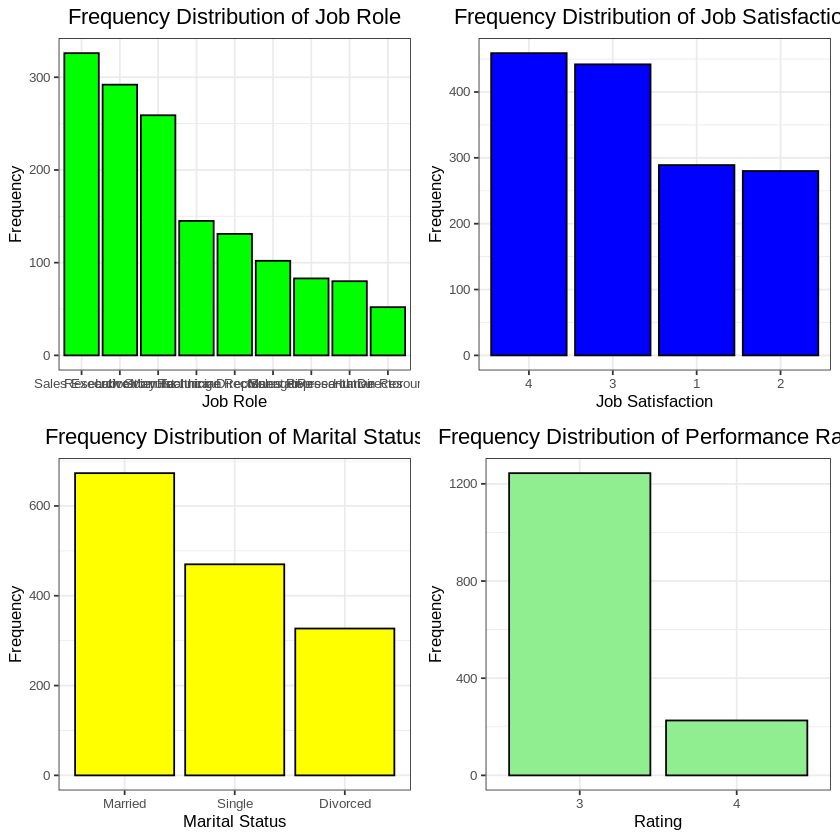

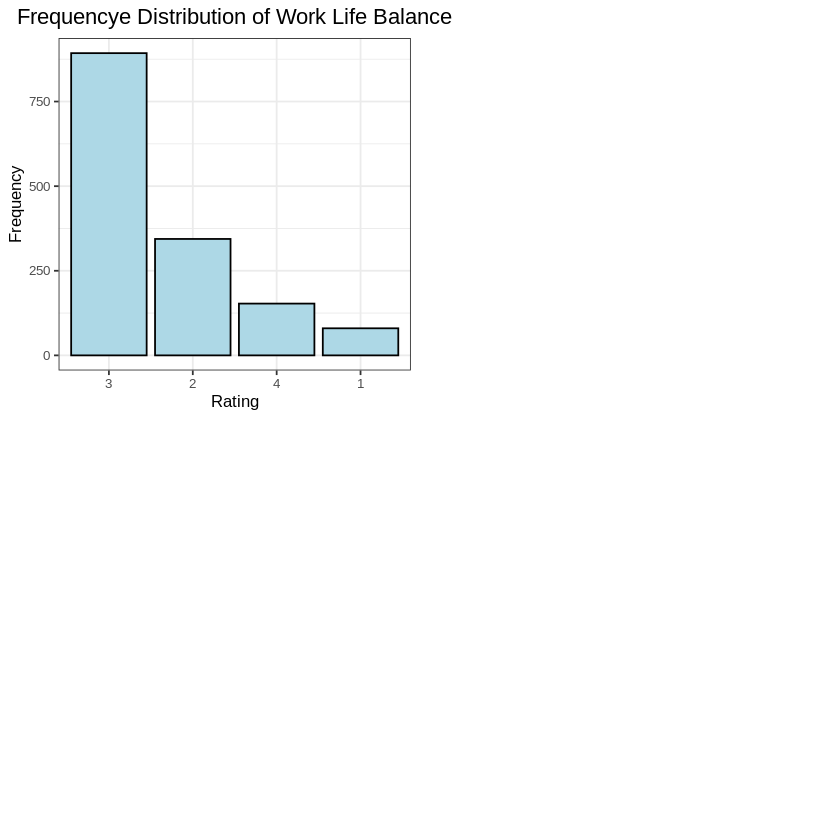

In [ ]:
#Part 2 - Univariate Analysis of Categorical Values

# Create a bar plot for employee attrition
# Create a frequency table of the data
UniTable <- table(Attrition$Attrition)

# Convert the frequency table to a data frame
UniDF <- as.data.frame(UniTable)

# Plot the frequency distribution sorted by descending frequency
PlotC1 <-
  ggplot(UniDF, aes(x = reorder(Var1,-Freq), y = Freq)) +
    geom_bar(stat = "identity", color = "black", fill = "red") +
    labs(title = "Frequency Distribution of Attrition Status",
       x = "Attrition",
       y = "Frequency") +
    theme_bw() +
    theme(plot.title = element_text(hjust = 0.5),
        axis.text = element_text(size = 8),
        axis.title = element_text(size = 10))


# Create a bar plot for employee business travel
# Create a frequency table of the data
UniTable <- table(Attrition$BusinessTravel)

# Convert the frequency table to a data frame
UniDF <- as.data.frame(UniTable)

# Plot the frequency distribution sorted by descending frequency
PlotC2 <-
  ggplot(UniDF, aes(x = reorder(Var1,-Freq), y = Freq)) +
    geom_bar(stat = "identity", color = "black", fill = "purple") +
    labs(title = "Frequency Distribution of Travel Status",
       x = "Travel Status",
       y = "Frequency") +
    theme_bw() +
    theme(plot.title = element_text(hjust = 0.5),
        axis.text = element_text(size = 8),
        axis.title = element_text(size = 10))


# Create a bar plot for employee department
# Create a frequency table of the data
UniTable <- table(Attrition$Department)

# Convert the frequency table to a data frame
UniDF <- as.data.frame(UniTable)

# Plot the frequency distribution sorted by descending frequency
PlotC3 <-
  ggplot(UniDF, aes(x = reorder(Var1,-Freq), y = Freq)) +
    geom_bar(stat = "identity", color = "black", fill = "pink") +
    labs(title = "Frequency Distribution of Department",
       x = "Department",
       y = "Frequency") +
    theme_bw() +
    theme(plot.title = element_text(hjust = 0.5),
        axis.text = element_text(size = 8),
        axis.title = element_text(size = 10))


# Create a bar plot for employee gender
# Create a frequency table of the data
UniTable <- table(Attrition$Gender)

# Convert the frequency table to a data frame
UniDF <- as.data.frame(UniTable)

# Plot the frequency distribution sorted by descending frequency
PlotC4 <-
  ggplot(UniDF, aes(x = reorder(Var1,-Freq), y = Freq)) +
    geom_bar(stat = "identity", color = "black", fill = "grey") +
    labs(title = "Frequency Distribution of Gender",
       x = "Gender",
       y = "Frequency") +
    theme_bw() +
    theme(plot.title = element_text(hjust = 0.5),
        axis.text = element_text(size = 8),
        axis.title = element_text(size = 10))


# Create a bar plot for employee job role
# Create a frequency table of the data
UniTable <- table(Attrition$JobRole)

# Convert the frequency table to a data frame
UniDF <- as.data.frame(UniTable)

# Plot the frequency distribution sorted by descending frequency
PlotC5 <-
  ggplot(UniDF, aes(x = reorder(Var1,-Freq), y = Freq)) +
    geom_bar(stat = "identity", color = "black", fill = "green") +
    labs(title = "Frequency Distribution of Job Role",
       x = "Job Role",
       y = "Frequency") +
    theme_bw() +
    theme(plot.title = element_text(hjust = 0.5),
        axis.text = element_text(size = 8),
        axis.title = element_text(size = 10))


# Create a bar plot for employee job satisfaction
# Create a frequency table of the data
UniTable <- table(Attrition$JobSatisfaction)

# Convert the frequency table to a data frame
UniDF <- as.data.frame(UniTable)

# Plot the frequency distribution sorted by descending frequency
PlotC6 <-
  ggplot(UniDF, aes(x = reorder(Var1,-Freq), y = Freq)) +
    geom_bar(stat = "identity", color = "black", fill = "blue") +
    labs(title = "Frequency Distribution of Job Satisfaction",
       x = "Job Satisfaction",
       y = "Frequency") +
    theme_bw() +
    theme(plot.title = element_text(hjust = 0.5),
        axis.text = element_text(size = 8),
        axis.title = element_text(size = 10))


# Create a bar plot for employee marital status
# Create a frequency table of the data
UniTable <- table(Attrition$MaritalStatus)

# Convert the frequency table to a data frame
UniDF <- as.data.frame(UniTable)

# Plot the frequency distribution sorted by descending frequency
PlotC7 <-
  ggplot(UniDF, aes(x = reorder(Var1,-Freq), y = Freq)) +
    geom_bar(stat = "identity", color = "black", fill = "yellow") +
    labs(title = "Frequency Distribution of Marital Status",
       x = "Marital Status",
       y = "Frequency") +
    theme_bw() +
    theme(plot.title = element_text(hjust = 0.5),
        axis.text = element_text(size = 8),
        axis.title = element_text(size = 10))


# Create a bar plot for employee performance rating
# Create a frequency table of the data
UniTable <- table(Attrition$PerformanceRating)

# Convert the frequency table to a data frame
UniDF <- as.data.frame(UniTable)

# Plot the frequency distribution sorted by descending frequency
PlotC8 <-
  ggplot(UniDF, aes(x = reorder(Var1,-Freq), y = Freq)) +
    geom_bar(stat = "identity", color = "black", fill = "lightgreen") +
    labs(title = "Frequency Distribution of Performance Rating",
       x = "Rating",
       y = "Frequency") +
    theme_bw() +
    theme(plot.title = element_text(hjust = 0.5),
        axis.text = element_text(size = 8),
        axis.title = element_text(size = 10))


# Create a bar plot for employee work life balance
# Create a frequency table of the data
UniTable <- table(Attrition$WorkLifeBalance)

# Convert the frequency table to a data frame
UniDF <- as.data.frame(UniTable)

# Plot the frequency distribution sorted by descending frequency
PlotC9 <-
  ggplot(UniDF, aes(x = reorder(Var1,-Freq), y = Freq)) +
    geom_bar(stat = "identity", color = "black", fill = "lightblue") +
    labs(title = "Frequencye Distribution of Work Life Balance",
       x = "Rating",
       y = "Frequency") +
    theme_bw() +
    theme(plot.title = element_text(hjust = 0.5),
        axis.text = element_text(size = 8),
        axis.title = element_text(size = 10))

#Diplay the plots in a 2x2 matrix
ggarrange(PlotC1, PlotC2, PlotC3, PlotC4, ncol=2, nrow=2)
ggarrange(PlotC5, PlotC6, PlotC7, PlotC8, ncol=2, nrow=2)
ggarrange(PlotC9, ncol=2, nrow=2)

#Cleanup temporary dataframes and plots
rm(UniTable,UniDF,PlotC1,PlotC2,PlotC3,PlotC4,PlotC5,PlotC6,PlotC7,PlotC8,PlotC9)

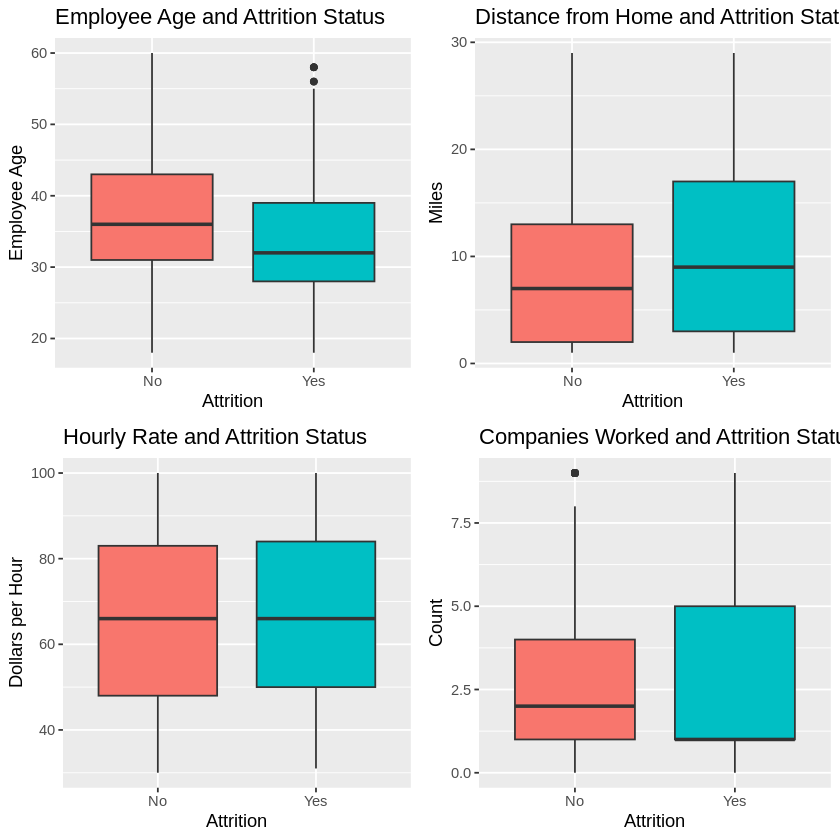

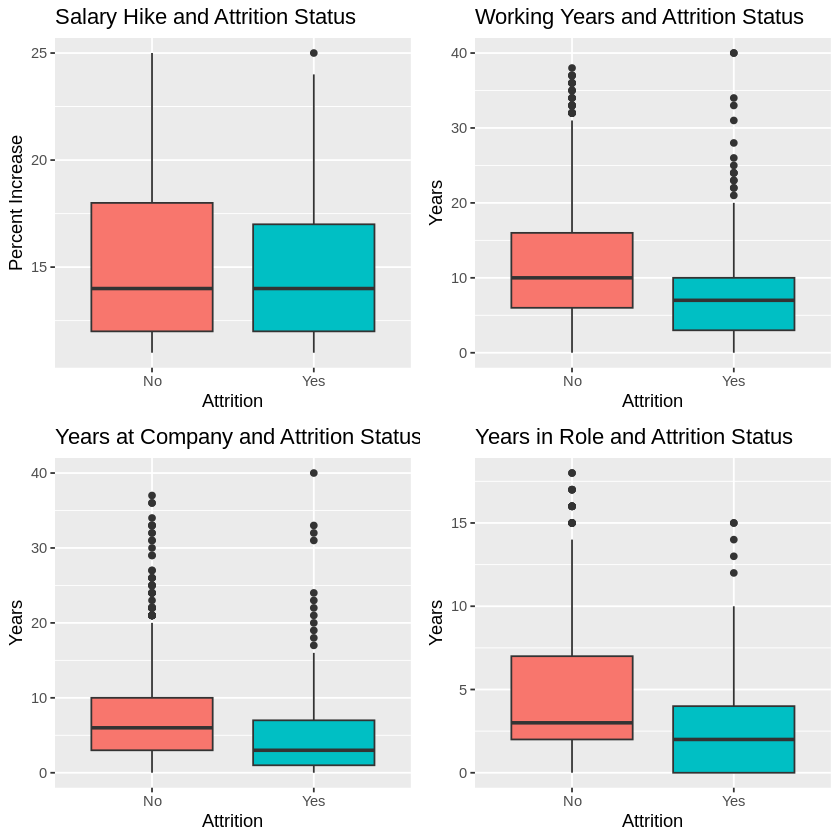

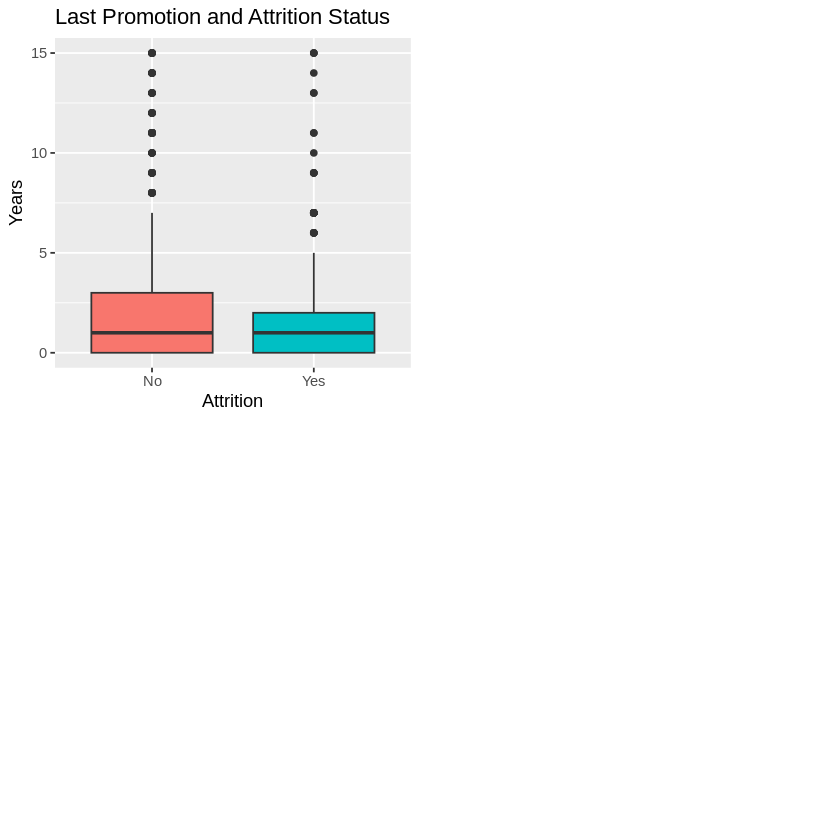

In [ ]:
#Part 3 - Bivariate Analysis of Quantitative Variables

#Create boxplots illustrating the quantitative values against attrition status
PlotB1 <-
  ggplot(Attrition, aes(x=Attrition, y=Age, fill=Attrition)) +
    geom_boxplot() +
    labs(title = "Employee Age and Attrition Status",
       x = "Attrition",
       y = "Employee Age") +
    theme(legend.position="none")

PlotB2 <-
  ggplot(Attrition, aes(x=Attrition, y=DistanceFromHome, fill=Attrition)) +
    geom_boxplot() +
    labs(title = "Distance from Home and Attrition Status",
       x = "Attrition",
       y = "Miles") +
    theme(legend.position="none")

PlotB3 <-
  ggplot(Attrition, aes(x=Attrition, y=HourlyRate, fill=Attrition)) +
    geom_boxplot() +
    labs(title = "Hourly Rate and Attrition Status",
       x = "Attrition",
       y = "Dollars per Hour") +
    theme(legend.position="none")

PlotB4 <-
  ggplot(Attrition, aes(x=Attrition, y=NumCompaniesWorked, fill=Attrition)) +
    geom_boxplot() +
    labs(title = "Companies Worked and Attrition Status",
       x = "Attrition",
       y = "Count") +
    theme(legend.position="none")

PlotB5 <-
  ggplot(Attrition, aes(x=Attrition, y=PercentSalaryHike, fill=Attrition)) +
    geom_boxplot() +
    labs(title = "Salary Hike and Attrition Status",
       x = "Attrition",
       y = "Percent Increase") +
    theme(legend.position="none")

PlotB6 <-
  ggplot(Attrition, aes(x=Attrition, y=TotalWorkingYears, fill=Attrition)) +
    geom_boxplot() +
    labs(title = "Working Years and Attrition Status",
       x = "Attrition",
       y = "Years") +
    theme(legend.position="none")

PlotB7 <-
  ggplot(Attrition, aes(x=Attrition, y=YearsAtCompany, fill=Attrition)) +
    geom_boxplot() +
    labs(title = "Years at Company and Attrition Status",
       x = "Attrition",
       y = "Years") +
    theme(legend.position="none")

PlotB8 <-
  ggplot(Attrition, aes(x=Attrition, y=YearsInCurrentRole, fill=Attrition)) +
    geom_boxplot() +
    labs(title = "Years in Role and Attrition Status",
       x = "Attrition",
       y = "Years") +
    theme(legend.position="none")

PlotB9 <-
  ggplot(Attrition, aes(x=Attrition, y=YearsSinceLastPromotion, fill=Attrition)) +
    geom_boxplot() +
    labs(title = "Last Promotion and Attrition Status",
       x = "Attrition",
       y = "Years") +
    theme(legend.position="none")

#Diplay the plots in a 2x2 matrix
ggarrange(PlotB1, PlotB2, PlotB3, PlotB4, ncol=2, nrow=2)
ggarrange(PlotB5, PlotB6, PlotB7, PlotB8, ncol=2, nrow=2)
ggarrange(PlotB9, ncol=2, nrow=2)

#Cleanup temporary dataframes and plots
rm(PlotB1,PlotB2,PlotB3,PlotB4,PlotB5,PlotB6,PlotB7,PlotB8,PlotB9)

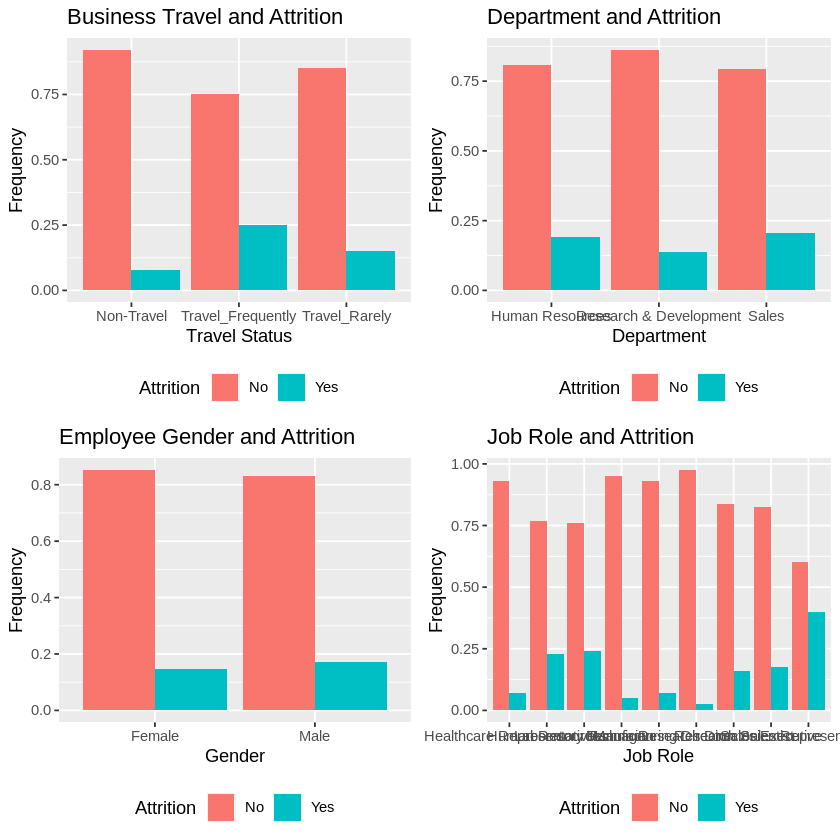

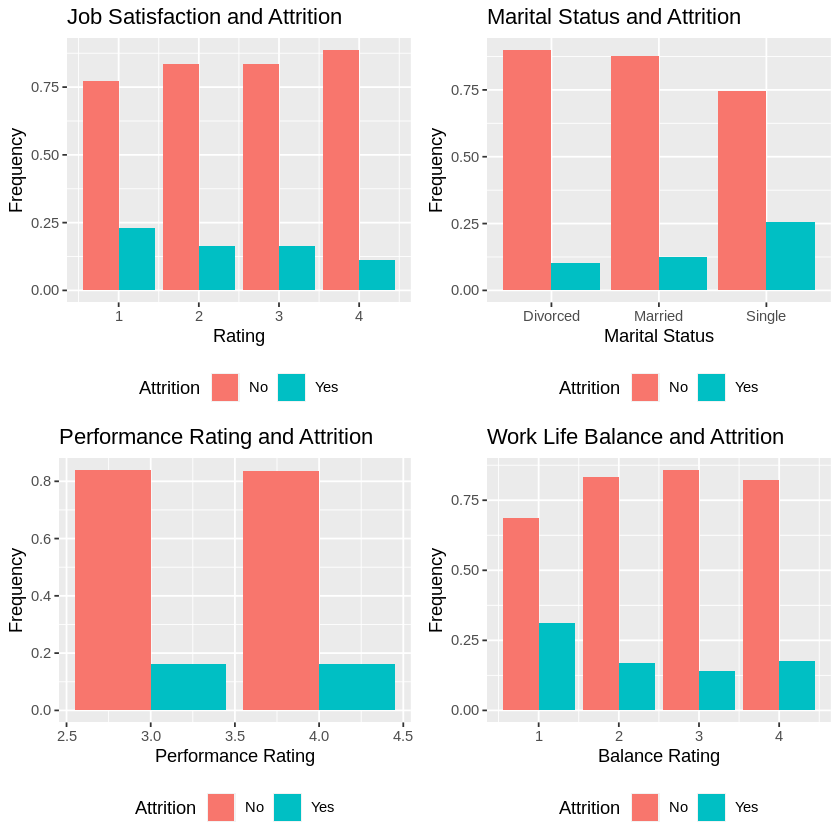

In [ ]:
#Part 4 - Bivariate Analysis of Categorical Variables

#Create a grouped bar chart for each of the categorical variables
#against the attrition status

#Hide the annoyting message dplyr is producing
options(dplyr.summarise.inform = FALSE)

#Select quantitative columns and create a histogram for each column
AttritionC <- Attrition[c(2,3,5,12,16,17,18,25,31)]


#Plot the frequency distribution of vehicle type by attrition status
AttritionF <- AttritionC %>% group_by(BusinessTravel,Attrition) %>% summarize(n=n()) %>% mutate(freq=n/sum(n))

PlotB1 <-
  ggplot(AttritionF, aes(x=BusinessTravel, fill = Attrition, group = Attrition)) +
    geom_bar(aes(y = freq), stat="identity", position = "dodge") +
    labs(title = "Business Travel and Attrition",
       x = "Travel Status",
       y = "Frequency") +
    theme(legend.position="bottom")


#Plot the frequency distribution of department by attrition status
AttritionF <- AttritionC %>% group_by(Department,Attrition) %>% summarize(n=n()) %>% mutate(freq=n/sum(n))

PlotB2 <-
  ggplot(AttritionF, aes(x=Department, fill = Attrition, group = Attrition)) +
    geom_bar(aes(y = freq), stat="identity", position = "dodge") +
    labs(title = "Department and Attrition",
       x = "Department",
       y = "Frequency") +
    theme(legend.position="bottom")


#Plot the frequency distribution of gender by attrition status
AttritionF <- AttritionC %>% group_by(Gender,Attrition) %>% summarize(n=n()) %>% mutate(freq=n/sum(n))

PlotB3 <-
  ggplot(AttritionF, aes(x=Gender, fill = Attrition, group = Attrition)) +
    geom_bar(aes(y = freq), stat="identity", position = "dodge") +
    labs(title = "Employee Gender and Attrition",
       x = "Gender",
       y = "Frequency") +
    theme(legend.position="bottom")


#Plot the frequency distribution of job role by attrition status
AttritionF <- AttritionC %>% group_by(JobRole,Attrition) %>% summarize(n=n()) %>% mutate(freq=n/sum(n))

PlotB4 <-
  ggplot(AttritionF, aes(x=JobRole, fill = Attrition, group = Attrition)) +
    geom_bar(aes(y = freq), stat="identity", position = "dodge") +
    labs(title = "Job Role and Attrition",
       x = "Job Role",
       y = "Frequency") +
    theme(legend.position="bottom")


#Plot the frequency distribution of job satisfaction by attrition status
AttritionF <- AttritionC %>% group_by(JobSatisfaction,Attrition) %>% summarize(n=n()) %>% mutate(freq=n/sum(n))

PlotB5 <-
  ggplot(AttritionF, aes(x=JobSatisfaction, fill = Attrition, group = Attrition)) +
    geom_bar(aes(y = freq), stat="identity", position = "dodge") +
    labs(title = "Job Satisfaction and Attrition",
       x = "Rating",
       y = "Frequency") +
    theme(legend.position="bottom")


#Plot the frequency distribution of marital status by attrition status
AttritionF <- AttritionC %>% group_by(MaritalStatus,Attrition) %>% summarize(n=n()) %>% mutate(freq=n/sum(n))

PlotB6 <-
  ggplot(AttritionF, aes(x=MaritalStatus, fill = Attrition, group = Attrition)) +
    geom_bar(aes(y = freq), stat="identity", position = "dodge") +
    labs(title = "Marital Status and Attrition",
       x = "Marital Status",
       y = "Frequency") +
    theme(legend.position="bottom")


#Plot the frequency distribution of performance rating by attrition status
AttritionF <- AttritionC %>% group_by(PerformanceRating,Attrition) %>% summarize(n=n()) %>% mutate(freq=n/sum(n))

PlotB7 <-
  ggplot(AttritionF, aes(x=PerformanceRating, fill = Attrition, group = Attrition)) +
    geom_bar(aes(y = freq), stat="identity", position = "dodge") +
    labs(title = "Performance Rating and Attrition",
       x = "Performance Rating",
       y = "Frequency") +
    theme(legend.position="bottom")


#Plot the frequency distribution of work life balance by attrition status
AttritionF <- AttritionC %>% group_by(WorkLifeBalance,Attrition) %>% summarize(n=n()) %>% mutate(freq=n/sum(n))

PlotB8 <-
  ggplot(AttritionF, aes(x=WorkLifeBalance, fill = Attrition, group = Attrition)) +
    geom_bar(aes(y = freq), stat="identity", position = "dodge") +
    labs(title = "Work Life Balance and Attrition",
       x = "Balance Rating",
       y = "Frequency") +
    theme(legend.position="bottom")


#Diplay the plots in a 2x2 matrix
ggarrange(PlotB1, PlotB2, PlotB3, PlotB4, ncol=2, nrow=2)
ggarrange(PlotB5, PlotB6, PlotB7, PlotB8, ncol=2, nrow=2)

#Cleanup temporary dataframes and plots
rm(AttritionF,AttritionC,PlotB1,PlotB2,PlotB3,PlotB4,PlotB5,PlotB6,PlotB7,PlotB8)

**Step 3: Explain the Findings from the EDA**

In this step, review the results of the EDA to determine any trends that may influence the design of the survival models. These trends may be the range of values, frequency of values, or potential correlations. The results of the EDA help determine the factors to use in the analysis as well as any constraints (filters) to place on the data.

Additionally, identify the reseach questions for your survival models. These are the questions you pose based on the results of your EDA.

In [ ]:
#Univariate Analysis
#The quantitative univariate results from the EDA showed TotalWorkingYears, YearsAtCompany, YearsInCurrentRole,
#and YearsSinceLastPromotion all included outliers. If these variables are used in the model,
#some filtering may be needed to remove outliers - if a business rule exists to filter these outliers. The
#categorical univariate analysis showed the data skewing for current employees, employees that travel rarely,
#are more male than female, and are married.

#Bivariate Analysis
#The bivariate analysis indicated potential correlation between attrition and BusinessTravel, Gender,
#MaritalStatus, NumCompaniesWorked, and WorkLifeBalance. These are the variables included in the
#survival analysis.

#Research Questions
#1 Does the level of business travel lead to earlier attrition with the company?
#2 Does the employee's gender correspond with earlier attrition with the company?
#3 Does the employee's maritial status correspond with earlier attrition with the company?
#4 Does the number of previous employers lead to earlier attrition with the company?
#5 Does the employee's work/life balance response correspond with earlier attrition with the company?
#6 Does a combindation of these factors lead to an earlier attrition with the company?

**Step 4: Prepare Data for Anaysis**

In this step, the data is prepared for analysis. For my project, the data is moved into a separate working frame so that I am left with the original data in the event I need to revert back to this data.

Next, I select a subset of data that I wish to include in my analysis. The columns included should be derrived directly from the EDA. These are the columns proven to most likely influence the survival event. Next, I remove any rows containing empty data. Once the rows are prepared, I convert several of the columns to the correct data type. My dependent variable is setup as 0 or 1 value indicating survival (in this case attrition).

In addition to the dependent variable, I convert my dependent variables to factors since these are categorical rather than continuous variables.

In [ ]:
#Create working dataframe
SA_data <- Attrition

#Select colums for analysis
SA_data <- SA_data[c(2,3,12,18,21,31,32)]

#Delete rows with NA
SA_data <- na.omit(SA_data)

#Convert data for Survival Analysis
SA_data$Attrition <- ifelse(SA_data$Attrition == "No",0,1)
SA_data$BusinessTravel <- as.factor(SA_data$BusinessTravel)
SA_data$Gender <- as.factor(SA_data$Gender)
SA_data$MaritalStatus <- as.factor(SA_data$MaritalStatus)
SA_data$NumCompaniesWorked <- as.factor(ifelse(SA_data$NumCompaniesWorked < 4,"Few","Many"))
SA_data$WorkLifeBalance <- as.factor(SA_data$WorkLifeBalance)

glimpse(SA_data)

Rows: 1,470
Columns: 7
$ Attrition          <dbl> 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, …
$ BusinessTravel     <fct> Travel_Rarely, Travel_Frequently, Travel_Rarely, Tr…
$ Gender             <fct> Female, Male, Male, Female, Male, Male, Female, Mal…
$ MaritalStatus      <fct> Single, Married, Single, Married, Married, Single, …
$ NumCompaniesWorked <fct> Many, Few, Many, Few, Many, Few, Many, Few, Few, Ma…
$ WorkLifeBalance    <fct> 1, 3, 3, 3, 3, 2, 2, 3, 3, 2, 3, 3, 2, 3, 3, 3, 2, …
$ YearsAtCompany     <int> 6, 10, 0, 8, 2, 7, 1, 1, 9, 7, 5, 9, 5, 2, 4, 10, 6…


**Step 5: Create Kaplan-Meier Models**

Create several Kaplan-Meier models of your data and plot it. Apply the model across all groups, by group, by group and one predictor, and by group and a different predictor. (see my examples below)

Use comments to discuss your findings. What is the “survival” estimate at 1 year? If years are not a good fit for your data, feel free to use an alternative (e.g. hours, days, months). What is the median survival time?

----------Business Travel----------



Call: survfit(formula = Surv(YearsAtCompany, Attrition) ~ BusinessTravel, 
    data = SA_data)

                                    n events median 0.95LCL 0.95UCL
BusinessTravel=Non-Travel         150     12     NA      NA      NA
BusinessTravel=Travel_Frequently  277     69     NA      21      NA
BusinessTravel=Travel_Rarely     1043    156     33      31      NA




----------Business Travel Differences----------



Call:
survdiff(formula = Surv(YearsAtCompany, Attrition) ~ BusinessTravel, 
    data = SA_data)

                                    N Observed Expected (O-E)^2/E (O-E)^2/V
BusinessTravel=Non-Travel         150       12     24.5     6.413      7.34
BusinessTravel=Travel_Frequently  277       69     45.0    12.820     16.25
BusinessTravel=Travel_Rarely     1043      156    167.5     0.785      2.75

 Chisq= 20.6  on 2 degrees of freedom, p= 3e-05 




----------Probability Plot - Business Travel----------



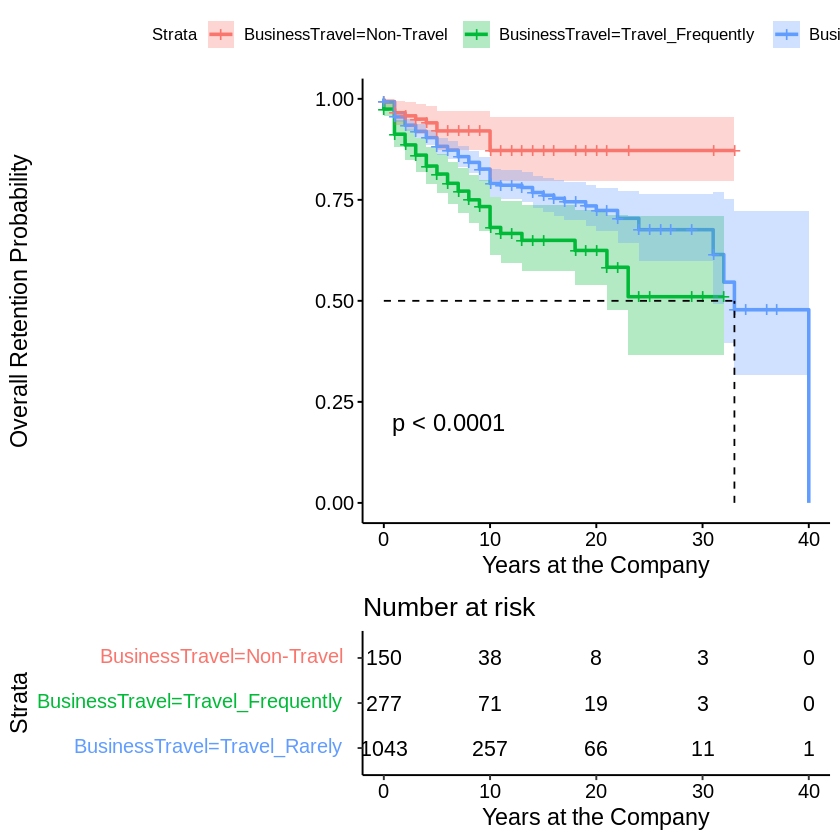

In [ ]:
#Apply the model by Business Travel and use the log-rank test to determine
#if there is a significant difference between your groups for survival.

#Create the survival model and view the results
SA_Travel <- survfit(Surv(YearsAtCompany, Attrition) ~ BusinessTravel, data = SA_data)
message("----------Business Travel----------")
SA_Travel

#Calculate and view log-rank results
SA_TravelLR <- survdiff(Surv(YearsAtCompany, Attrition) ~ BusinessTravel, data = SA_data)
message("\n\n\n----------Business Travel Differences----------")
SA_TravelLR

#Plot model results
message("\n\n\n----------Probability Plot - Business Travel----------")
ggsurvplot(
    fit = SA_Travel,
    data = SA_data,
    pval = TRUE,
    conf.int = TRUE,
    risk.table = TRUE,
    surv.median.line = "hv",
    xlab = "Years at the Company",
    ylab = "Overall Retention Probability",
    tables.height = 0.3)


----------Gender----------



Call: survfit(formula = Surv(YearsAtCompany, Attrition) ~ Gender, data = SA_data)

                n events median 0.95LCL 0.95UCL
Gender=Female 588     87     32      32      NA
Gender=Male   882    150     NA      31      NA




----------Gender Differences----------



Call:
survdiff(formula = Surv(YearsAtCompany, Attrition) ~ Gender, 
    data = SA_data)

                N Observed Expected (O-E)^2/E (O-E)^2/V
Gender=Female 588       87       97     1.022      1.79
Gender=Male   882      150      140     0.708      1.79

 Chisq= 1.8  on 1 degrees of freedom, p= 0.2 




----------Probability Plot - Gender----------



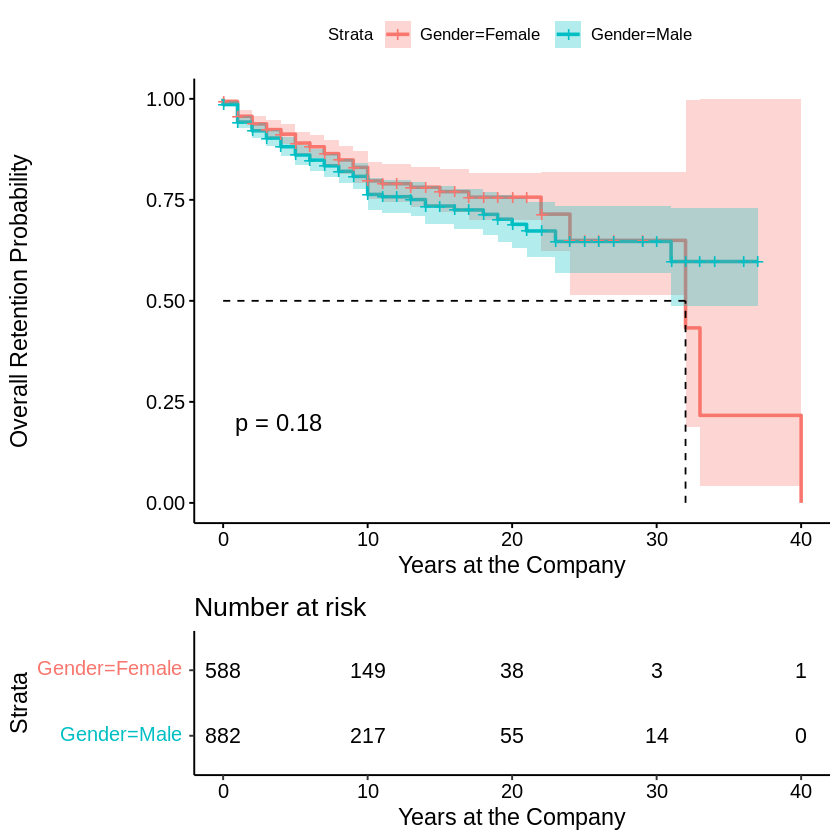

In [ ]:
#Apply the model by Gender  and use the log-rank test to determine
#if there is a significant difference between your groups for survival.

#Create the survival model and view the results
SA_Gender <- survfit(Surv(YearsAtCompany, Attrition) ~ Gender, data = SA_data)
message("----------Gender----------")
SA_Gender

#Calculate and view log-rank results
SA_GenderLR <- survdiff(Surv(YearsAtCompany, Attrition) ~ Gender, data = SA_data)
message("\n\n\n----------Gender Differences----------")
SA_GenderLR

message("\n\n\n----------Probability Plot - Gender----------")
ggsurvplot(
    fit = SA_Gender,
    data = SA_data,
    pval = TRUE,
    conf.int = TRUE,
    risk.table = TRUE,
    surv.median.line = "hv",
    xlab = "Years at the Company",
    ylab = "Overall Retention Probability",
    tables.height = 0.3)

----------Marital Status----------



Call: survfit(formula = Surv(YearsAtCompany, Attrition) ~ MaritalStatus, 
    data = SA_data)

                         n events median 0.95LCL 0.95UCL
MaritalStatus=Divorced 327     33     NA      NA      NA
MaritalStatus=Married  673     84     33      32      NA
MaritalStatus=Single   470    120     24      19      NA




----------Marital Status Differences----------



Call:
survdiff(formula = Surv(YearsAtCompany, Attrition) ~ MaritalStatus, 
    data = SA_data)

                         N Observed Expected (O-E)^2/E (O-E)^2/V
MaritalStatus=Divorced 327       33     53.9       8.1      10.8
MaritalStatus=Married  673       84    113.1       7.5      14.8
MaritalStatus=Single   470      120     70.0      35.8      52.2

 Chisq= 52.8  on 2 degrees of freedom, p= 3e-12 




----------Probability Plot - Marital Status----------



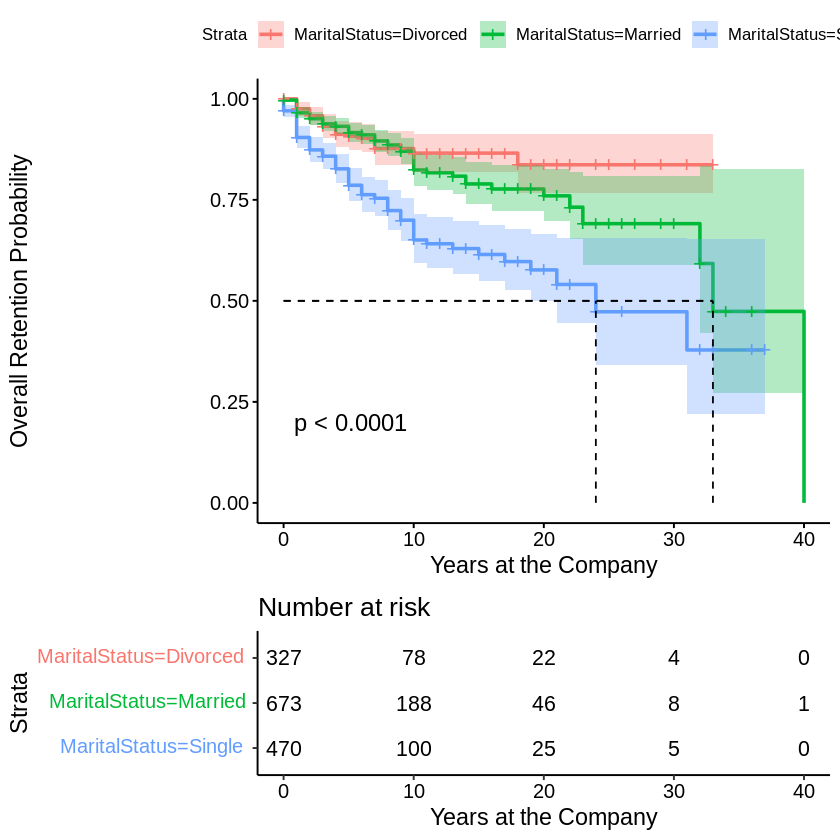

In [ ]:
#Apply the model by Marital Status and use the log-rank test to determine
#if there is a significant difference between your groups for survival.

#Create the survival model and view the results
SA_Marital <- survfit(Surv(YearsAtCompany, Attrition) ~ MaritalStatus, data = SA_data)
message("----------Marital Status----------")
SA_Marital

#Calculate and view log-rank results
SA_MaritalLR <- survdiff(Surv(YearsAtCompany, Attrition) ~ MaritalStatus, data = SA_data)
message("\n\n\n----------Marital Status Differences----------")
SA_MaritalLR

message("\n\n\n----------Probability Plot - Marital Status----------")
ggsurvplot(
    fit = SA_Marital,
    data = SA_data,
    pval = TRUE,
    conf.int = TRUE,
    risk.table = TRUE,
    surv.median.line = "hv",
    xlab = "Years at the Company",
    ylab = "Overall Retention Probability",
    tables.height = 0.3)

----------Number of Companies Worked----------



Call: survfit(formula = Surv(YearsAtCompany, Attrition) ~ NumCompaniesWorked, 
    data = SA_data)

                           n events median 0.95LCL 0.95UCL
NumCompaniesWorked=Few  1023    153     40      33      NA
NumCompaniesWorked=Many  447     84     31      23      NA




----------Companies Worked Differences----------



Call:
survdiff(formula = Surv(YearsAtCompany, Attrition) ~ NumCompaniesWorked, 
    data = SA_data)

                           N Observed Expected (O-E)^2/E (O-E)^2/V
NumCompaniesWorked=Few  1023      153    173.5      2.42      9.35
NumCompaniesWorked=Many  447       84     63.5      6.60      9.35

 Chisq= 9.3  on 1 degrees of freedom, p= 0.002 




----------Probability Plot - Companies Worked----------



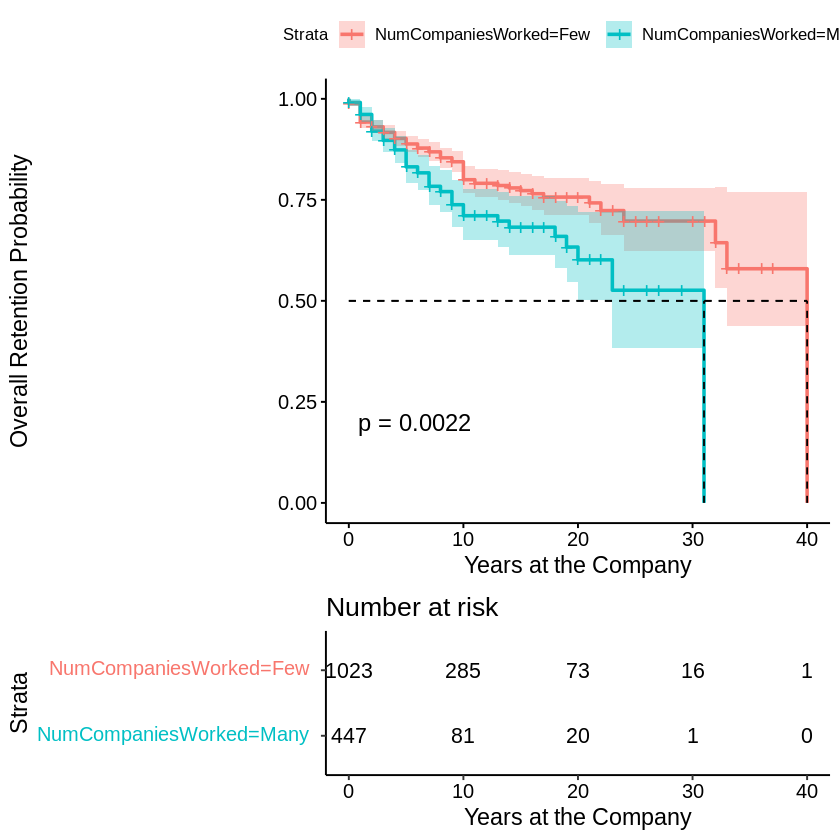

In [ ]:
#Apply the model by Number of Companies and use the log-rank test to determine
#if there is a significant difference between your groups for survival.

#Create the survival model and view the results
SA_NumC <- survfit(Surv(YearsAtCompany, Attrition) ~ NumCompaniesWorked, data = SA_data)
message("----------Number of Companies Worked----------")
SA_NumC

#Calculate and view log-rank results
SA_NumCLR <- survdiff(Surv(YearsAtCompany, Attrition) ~ NumCompaniesWorked, data = SA_data)
message("\n\n\n----------Companies Worked Differences----------")
SA_NumCLR

message("\n\n\n----------Probability Plot - Companies Worked----------")
ggsurvplot(
    fit = SA_NumC,
    data = SA_data,
    pval = TRUE,
    conf.int = TRUE,
    risk.table = TRUE,
    surv.median.line = "hv",
    xlab = "Years at the Company",
    ylab = "Overall Retention Probability",
    tables.height = 0.3)

----------Work Life Balance----------



Call: survfit(formula = Surv(YearsAtCompany, Attrition) ~ WorkLifeBalance, 
    data = SA_data)

                    n events median 0.95LCL 0.95UCL
WorkLifeBalance=1  80     25     14      10      NA
WorkLifeBalance=2 344     58     40      NA      NA
WorkLifeBalance=3 893    127     33      32      NA
WorkLifeBalance=4 153     27     NA      NA      NA




----------Work Life Balance Differences----------



Call:
survdiff(formula = Surv(YearsAtCompany, Attrition) ~ WorkLifeBalance, 
    data = SA_data)

                    N Observed Expected (O-E)^2/E (O-E)^2/V
WorkLifeBalance=1  80       25     11.9   14.5253   15.6985
WorkLifeBalance=2 344       58     56.7    0.0278    0.0381
WorkLifeBalance=3 893      127    143.8    1.9549    5.1295
WorkLifeBalance=4 153       27     24.6    0.2295    0.2627

 Chisq= 17.2  on 3 degrees of freedom, p= 6e-04 




----------Probability Plot - Work Life Balance----------



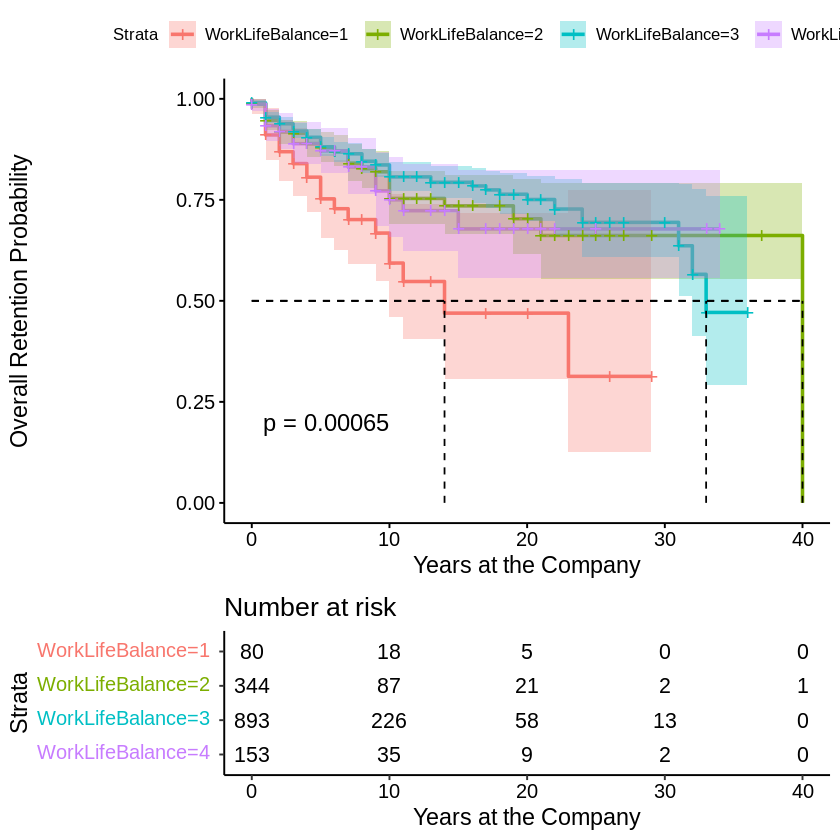

In [ ]:
#Apply the model by Work Life Balance and use the log-rank test to determine
#if there is a significant difference between your groups for survival.

#Create the survival model and view the results
SA_WL <- survfit(Surv(YearsAtCompany, Attrition) ~ WorkLifeBalance, data = SA_data)
message("----------Work Life Balance----------")
SA_WL

#Calculate and view log-rank results
SA_WLLR <- survdiff(Surv(YearsAtCompany, Attrition) ~ WorkLifeBalance, data = SA_data)
message("\n\n\n----------Work Life Balance Differences----------")
SA_WLLR

message("\n\n\n----------Probability Plot - Work Life Balance----------")
ggsurvplot(
    fit = SA_WL,
    data = SA_data,
    pval = TRUE,
    conf.int = TRUE,
    risk.table = TRUE,
    surv.median.line = "hv",
    xlab = "Years at the Company",
    ylab = "Overall Retention Probability",
    tables.height = 0.3)

----------All Selected Variables----------



Call: survfit(formula = Surv(YearsAtCompany, Attrition) ~ 1, data = SA_data)

        n events median 0.95LCL 0.95UCL
[1,] 1470    237     40      32      NA




----------Probability Plot - All Variables----------



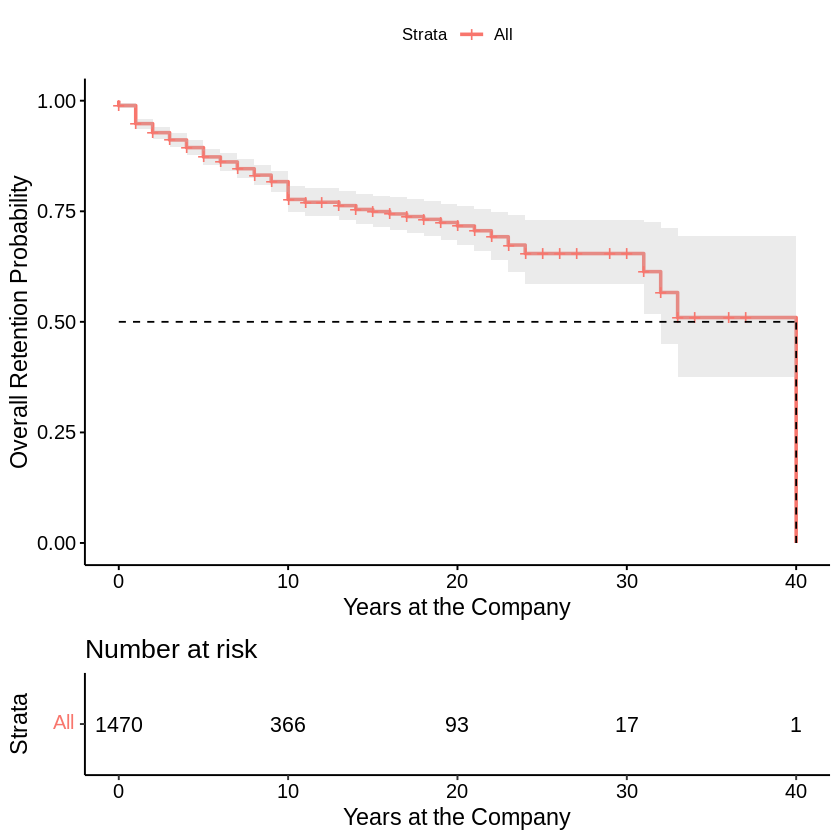

In [ ]:
#Apply the model across ALL groups
SA_All <- survfit(Surv(YearsAtCompany, Attrition) ~ 1, data = SA_data)

message("----------All Selected Variables----------")
SA_All

message("\n\n\n----------Probability Plot - All Variables----------")
ggsurvplot(
    fit = SA_All,
    data = SA_data,
    conf.int = TRUE,            # plot the confidence interval of the survival probability
    risk.table = TRUE,          # draw the risk table below the graph
    surv.median.line = "hv",    # draw the survival median line horizontally & vertically
    xlab = "Years at the Company",
    ylab = "Overall Retention Probability")

**Step 6: Create Cox Models**

Build a Cox regression model of your data that helps answer your question.Report the hazard ratios for your model.

In [ ]:
#Build a Cox Regression Model for each of the variables

#Create the Cox model for Business Travel and display the model summary
CoxTravel <- coxph( Surv(YearsAtCompany, Attrition) ~ BusinessTravel, data = SA_data )
message("----------Cox Regression Model - Business Travel----------")
summary(CoxTravel)

#Create the Cox model for Gender and display the model summary
CoxGender <- coxph( Surv(YearsAtCompany, Attrition) ~ Gender, data = SA_data )
message("\n\n\n----------Cox Regression Model - Gender----------")
summary(CoxGender)

#Create the Cox model for Marital Status and display the model summary
CoxMarital <- coxph( Surv(YearsAtCompany, Attrition) ~ MaritalStatus, data = SA_data )
message("\n\n\n----------Cox Regression Model - Marital Status----------")
summary(CoxMarital)

#Create the Cox model for Companies Worked and display the model summary
CoxNumC <- coxph( Surv(YearsAtCompany, Attrition) ~ NumCompaniesWorked, data = SA_data )
message("\n\n\n----------Cox Regression Model - Companies Worked----------")
summary(CoxNumC)

#Create the Cox model for Work Life Balance and display the model summary
CoxWL <- coxph( Surv(YearsAtCompany, Attrition) ~ WorkLifeBalance, data = SA_data )
message("\n\n\n----------Cox Regression Model - Work Life Balance----------")
summary(CoxWL)

----------Cox Regression Model - Business Travel----------



Call:
coxph(formula = Surv(YearsAtCompany, Attrition) ~ BusinessTravel, 
    data = SA_data)

  n= 1470, number of events= 237 

                                  coef exp(coef) se(coef)     z Pr(>|z|)    
BusinessTravelTravel_Frequently 1.1564    3.1785   0.3130 3.695  0.00022 ***
BusinessTravelTravel_Rarely     0.6489    1.9135   0.2997 2.165  0.03039 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

                                exp(coef) exp(-coef) lower .95 upper .95
BusinessTravelTravel_Frequently     3.179     0.3146     1.721     5.870
BusinessTravelTravel_Rarely         1.913     0.5226     1.063     3.443

Concordance= 0.569  (se = 0.017 )
Likelihood ratio test= 20.2  on 2 df,   p=4e-05
Wald test            = 19.63  on 2 df,   p=5e-05
Score (logrank) test = 20.54  on 2 df,   p=3e-05





----------Cox Regression Model - Gender----------



Call:
coxph(formula = Surv(YearsAtCompany, Attrition) ~ Gender, data = SA_data)

  n= 1470, number of events= 237 

             coef exp(coef) se(coef)     z Pr(>|z|)
GenderMale 0.1812    1.1987   0.1355 1.338    0.181

           exp(coef) exp(-coef) lower .95 upper .95
GenderMale     1.199     0.8342    0.9192     1.563

Concordance= 0.529  (se = 0.017 )
Likelihood ratio test= 1.82  on 1 df,   p=0.2
Wald test            = 1.79  on 1 df,   p=0.2
Score (logrank) test = 1.8  on 1 df,   p=0.2





----------Cox Regression Model - Marital Status----------



Call:
coxph(formula = Surv(YearsAtCompany, Attrition) ~ MaritalStatus, 
    data = SA_data)

  n= 1470, number of events= 237 

                       coef exp(coef) se(coef)     z Pr(>|z|)    
MaritalStatusMarried 0.1919    1.2115   0.2059 0.932    0.351    
MaritalStatusSingle  1.0445    2.8420   0.1967 5.311 1.09e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

                     exp(coef) exp(-coef) lower .95 upper .95
MaritalStatusMarried     1.212     0.8254    0.8093     1.814
MaritalStatusSingle      2.842     0.3519    1.9329     4.179

Concordance= 0.617  (se = 0.019 )
Likelihood ratio test= 48.4  on 2 df,   p=3e-11
Wald test            = 49.32  on 2 df,   p=2e-11
Score (logrank) test = 52.93  on 2 df,   p=3e-12





----------Cox Regression Model - Companies Worked----------



Call:
coxph(formula = Surv(YearsAtCompany, Attrition) ~ NumCompaniesWorked, 
    data = SA_data)

  n= 1470, number of events= 237 

                         coef exp(coef) se(coef)     z Pr(>|z|)   
NumCompaniesWorkedMany 0.4126    1.5107   0.1368 3.016  0.00256 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

                       exp(coef) exp(-coef) lower .95 upper .95
NumCompaniesWorkedMany     1.511     0.6619     1.155     1.975

Concordance= 0.533  (se = 0.017 )
Likelihood ratio test= 8.71  on 1 df,   p=0.003
Wald test            = 9.1  on 1 df,   p=0.003
Score (logrank) test = 9.22  on 1 df,   p=0.002





----------Cox Regression Model - Work Life Balance----------



Call:
coxph(formula = Surv(YearsAtCompany, Attrition) ~ WorkLifeBalance, 
    data = SA_data)

  n= 1470, number of events= 237 

                    coef exp(coef) se(coef)      z Pr(>|z|)    
WorkLifeBalance2 -0.7357    0.4792   0.2400 -3.065  0.00217 ** 
WorkLifeBalance3 -0.8853    0.4126   0.2191 -4.041 5.31e-05 ***
WorkLifeBalance4 -0.6664    0.5135   0.2779 -2.398  0.01648 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

                 exp(coef) exp(-coef) lower .95 upper .95
WorkLifeBalance2    0.4792      2.087    0.2994    0.7670
WorkLifeBalance3    0.4126      2.424    0.2686    0.6338
WorkLifeBalance4    0.5135      1.947    0.2979    0.8854

Concordance= 0.544  (se = 0.019 )
Likelihood ratio test= 13.71  on 3 df,   p=0.003
Wald test            = 16.46  on 3 df,   p=9e-04
Score (logrank) test = 17.37  on 3 df,   p=6e-04


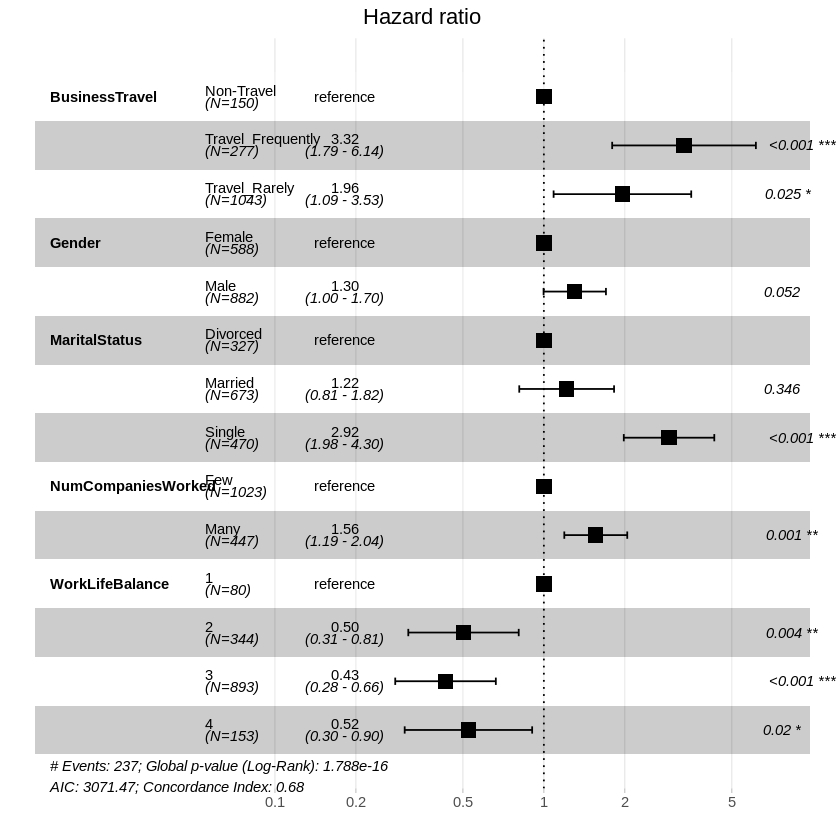

In [ ]:
#Create the Cox regession model
CoxModelAll <-
   coxph( Surv(YearsAtCompany, Attrition) ~ BusinessTravel + Gender + MaritalStatus +
     NumCompaniesWorked + WorkLifeBalance, data = SA_data )

#Plot the Hazard Ratio
ggforest(
  CoxModelAll,
  SA_data,
  fontsize = 0.8
)

**Step 7: Evaluate Results**

Evaluate each of the models in your survival analysis using the Kaplan-Meier and Cox models and determine the variables producing the best models. Explain your findings.

**Step 8: Explain the Model**

Using the comments, to write a lay-person explanation of the models and how the model can be applied.